*Authors: Nour Majdalawi, Petar Mihaylov, Branimir Sandalski, Leon Matijevic, Noah Greff, Konstantin Mihaylov (2021)*

# Pharmaceutical Challenge

In this notebook we are going to apply Machine Learning analysis on the Informa dataset, provided from the parmaceutical companies from Belgium. We will identify and justify the type of algorithms which we are going to use, apply Exploratory Data Analysis (EDA), create models, select and analyze features for our predictions.

### Table of Contents

- 1. [Introduction ](#section1)
- 2. [Attributes Information](#section2)
- 3. [Data Exploration](#section3)

- 4. [Informa Dataset Analysis](#section4)
    - 4.1. [Gender inequality](#section4.1)
    - 4.2. [Age Group Analysis](#section4.2)
    - 4.3. [Order Supply](#section4.3)
    
- 5. [Conclusion](#section5)
- 6. [References](#section6)


##  1. Introduction <a class="anchor" id="section1"></a>

#### Context

<p>
Informa provides data-related consultancy services to the actual customer who wants to remain anonymous. The customer has six rather large pharmacies in a specified region in Belgium. The customer has just started doing a bit of business intelligence. 
</p>

<p>
In this section, I will clean the data of Informa which needs to be used in order to help Informa with optimizing the costs reduction aspect for the chain of Belgian pharmacies they are affiliated with. We can approach this by helping pharmacies make better educated purchasing decisions by predicting what types of medicine will be most demanded by the patients during different time periods.
</p>

#### Data Cleaning
<p>
Data cleaning is an essintial part in developing machine learning in order to get to know the data we are dealing with. Some questions we want to ask in this module: 
</p>

<ul>
    <li>Do I have a proper data that can be used immediatly?</li>
    <li>Does the data have missing values?</li>
    <li>If yes, then how to deal with it?</li>
</ul>
<p>
<b>Data Wrangling</b> is the process of converting data from the initial format to a format that may be better for analysis.
We start off by importing all the necessary libraries. We'll need matplotlib to make some visualizations. We need numpy to handle the creation of data arrays, as well as a few other miscellaneous modules.
First, we show the versions of these libraries (that is always wise to do in case you have to report problems running the notebooks!) and use the inline plotting mode statement. 
</p>


## 2. Attributes Information <a class="anchor" id="section2"></a>
    
This data was provided by Informa, containing approximately 1.2 million rows in a <i>.csv</i> format.


|                   |                                   |
| :---------------- |:--------------------------------- |
| **ID**       | Unique ID| 
| **Patient token**   | A randomized token that can be used to identify specific patients in the data set. This token cannot be decrypted, so referencing back to the operating system of our relationship is not possible.                       |
| **Year of birth**   | Year of birth of the patient.|
| **Gender** | Gender of the patient. |
| **CNK** | A formal unique and nationwide specified identification of the product. |
| **Supply time** | The time the product is supplied to the patient. |
| **Supply date** |The date the product was supplied to the patient (ex. hours). |
| **Pharmacy** |Pharmacy where the product was purchased. |
| **Product Name**| The common name of the product. |
| **Price** | The price of the product (This is the official price, not what the patient has to pay).|
| **Units** | The number of product units inside a package. |
| **ATC code** | An international standardized code that is determined by the WHO and specifies on which organ or system it works on, and how it works. |

<p> We start off by importing all the necessary libraries. We'll need matplotlib to make some visualizations.

We need numpy to handle the creation of data arrays, as well as a few other miscellaneous modules.

First, we show the versions of these libraries (that is always wise to do in case you have to report problems running the notebooks!) and use the inline plotting mode statement. </p>

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('Importing the libraries that will ease working with images in the directores has been successfully done!')

Numpy version: 1.19.2
Pandas version: 1.1.3
Matplotlib version: 3.1.1
Seaborn version: 0.11.0
Importing the libraries that will ease working with images in the directores has been successfully done!


## 3. Data Exploration <a class="anchor" id="section3"></a>

<p> We start off by importing all the necessary libraries. We'll need matplotlib to make some visualizations.

We need numpy to handle the creation of data arrays, as well as a few other miscellaneous modules.

First, we show the versions of these libraries (that is always wise to do in case you have to report problems running the notebooks!) and use the inline plotting mode statement. </p>

Now, Let's use the pandas read_csv function to read the CSV file.

In [2]:
df_pharma = pd.read_csv("../data/rawdata.csv")
df_pharma.head()

,patient_token,supply_date,supply_time,pharmacy,year_of_birth,gender,cnk,product_name,atc,quantity,price
0,a,02/01/2017,17:14,A2,2016,2,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14
1,a,02/01/2017,17:14,A2,2016,2,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14
2,a,08/01/2020,15:13,A3,2019,1,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.29
3,a,09/01/2017,NaN,A1,2016,2,1543305,"ATROVENT MONODOSE 0,25MG/2ML VIALS 20",R03BB01,20,10.05
4,a,23/01/2020,11:21,A2,2019,1,2322436,ROTATEQ 1 TUBE 1 DOSE = 2 ML,J07BH02,1,53.37


We can see that our dataframe has no header, therefore we need to add the header according to the data defenition we have.

In [3]:
header = ["patient_token", "supply_date", "supply_hour", "pharmacy", "year_of_birth", 
          "gender", "cnk", "name", "atc", "quantity", "price"]
df_pharma.columns = header
df_pharma.head(2)

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price
0,a,02/01/2017,17:14,A2,2016,2,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14
1,a,02/01/2017,17:14,A2,2016,2,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14


Now we can see that we have added a header to our dataset.

We can see also that the supply date format is not supported so we need to converted to a format that we can deal with.

In [4]:
df_pharma['supply_date'] = pd.to_datetime(df_pharma['supply_date'])
df_pharma.head(2)

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price
0,a,2017-02-01,17:14,A2,2016,2,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14
1,a,2017-02-01,17:14,A2,2016,2,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14


In [5]:
df_pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202783 entries, 0 to 1202782
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   patient_token  1202783 non-null  object        
 1   supply_date    1202783 non-null  datetime64[ns]
 2   supply_hour    605721 non-null   object        
 3   pharmacy       1202783 non-null  object        
 4   year_of_birth  1202783 non-null  int64         
 5   gender         1202783 non-null  int64         
 6   cnk            1202783 non-null  int64         
 7   name           1202783 non-null  object        
 8   atc            1202783 non-null  object        
 9   quantity       1202783 non-null  int64         
 10  price          1202783 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 100.9+ MB


We have 1.202.278 entries (rows) and 11 features (columns).

In [6]:
# determing if ANY values in the dataset is missing
df_pharma.isnull().values.any()

True

In [7]:
total = df_pharma.isnull().sum().sort_values(ascending = False)
percent = (df_pharma.isnull().sum()/df_pharma.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
supply_hour,597062,49.640043
price,0,0.000000
quantity,0,0.000000
atc,0,0.000000
name,0,0.000000
cnk,0,0.000000
gender,0,0.000000
year_of_birth,0,0.000000
pharmacy,0,0.000000
supply_date,0,0.000000


In our dataset, we have 597.062 missing values in supply_hour column which forms almost **_49%_** of the total datset. It is indeed a huge number and therefore we need to have a proper way to deal with those missing data.

In [8]:
df_pharma.dtypes

patient_token            object
supply_date      datetime64[ns]
supply_hour              object
pharmacy                 object
year_of_birth             int64
gender                    int64
cnk                       int64
name                     object
atc                      object
quantity                  int64
price                   float64
dtype: object

- In our dataset, we have patient_token, pharmacy, name, and atc code as string
- supply_data and supply_hour as datetime64
- year_of_birth, gender, cnk code, and quantity as int64
- Price as float64

Using .describe() function to get the statistics about the numerical columns in the dataset

In [9]:
df_pharma.describe()

,year_of_birth,gender,cnk,quantity,price
count,1.202783e+06,1.202783e+06,1.202783e+06,1.202783e+06,1.202783e+06
mean,1.959383e+03,1.586658e+00,1.714129e+06,4.466074e+01,3.102018e+01
std,2.238733e+01,4.924638e-01,1.061172e+06,4.249574e+01,1.058063e+02
min,0.000000e+00,0.000000e+00,1.162700e+04,0.000000e+00,2.000000e-02
25%,1.943000e+03,1.000000e+00,7.895370e+05,1.000000e+00,7.950000e+00
50%,1.957000e+03,2.000000e+00,1.677863e+06,3.000000e+01,1.196000e+01
75%,1.973000e+03,2.000000e+00,2.557163e+06,9.000000e+01,2.324000e+01
max,2.020000e+03,2.000000e+00,7.716558e+06,3.000000e+02,4.018330e+03


The describe() function returns the count, mean, std, min, max, 25%, 50%, and 75% of each coloumn.
<p>We can see that each of our different variable has its own standard deviation. Specifically, something like gender has a much smaller std comparing to the others. This issue will be handeld via the StandardScaler from sklearn.preprocessing which we will highlight later on.  </p>

We can spot that the feature gender in numeric. Let's discover it more to see how many categories do we have

In [10]:
df_pharma['gender'].value_counts().sort_values(ascending=False).to_frame()

,gender
2,705640
1,497125
0,18


Apparently, the highest number of gender of the patients is **_2_** and the lowest is **_0_**.

Before moving on, we should try and redefine gender as the numbering does not tell anything regarding gender (0, 1, 2). 

To make this difference, we will look at the ATC code and explore the dataset more. We find that there are two ATC codes which are highly gender-specfic. Which are **_G03C_** and **_G03B_** that relates to female and male repsectively.

In [11]:
# defining simple function to plot gender versus ATC
def plot_gender_graph_atc(atc):
    gender = df_pharma.groupby(['gender', 'atc'], as_index=False).count()

    gender = gender[gender['atc'].str.contains(atc)].groupby('gender', as_index=False).sum()

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    sns.barplot(x="gender", y="patient_token", data=gender, ci=None, order=[2, 1])
    plt.xlabel("Gender", fontsize=16)
    plt.ylabel("Unique Customers", fontsize=16)
    plt.title(f"Number of unique customers for estrogen-related products by gender of {atc}", fontsize=12)
    plt.tight_layout()
    plt.show(fig)

First, let's calling the plot_gender_graph_atc for the female related medicine

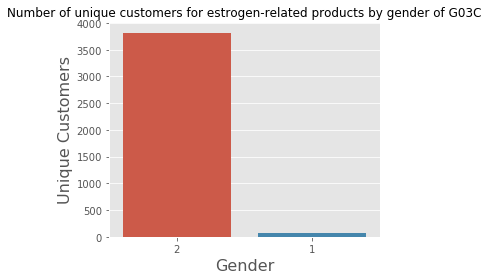

In [12]:
# plotting graphs
plot_gender_graph_atc('G03C') # female related meds.

Altough the fact that we can directly see that Female represented by number 2 and male by number 1, let's calling the plot_gender_graph_atc for the male related medicine to make sure those matches.

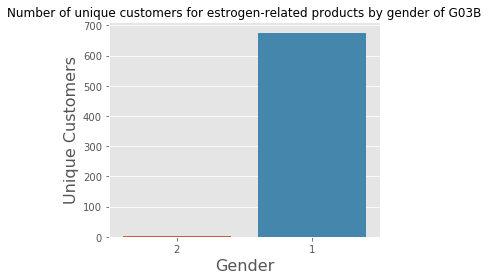

In [13]:
plot_gender_graph_atc('G03B') # male related meds.

From the graphs above, we can clearly make a distinction between genders. More specifically, based on the ATC code, we can determine that **_1_** is _male_ and the **_2_** is female. 

Furthermore, we still have the gender **_0_** which could either be _undefined_ or _children_.

Generally speaking we have male and female gender which could be represented in 1 and 2. Therefore number 0 is a bit confusing so let's select the first 5 rows of the patient with gender 0 to see their etc code.

In [14]:
df_pharma[df_pharma['gender']==0].head(2)

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price
27252,jq8SB8nBo$TZ,2015-11-01,NaN,A1,2009,0,2660975,MOBISTIX JUNIOR INSTANT 250MG GRAN ZAKJE 24X250MG,N02BE01,24,6.11
27253,jq8SB8nBo$TZ,2015-11-01,NaN,A1,2009,0,2660975,MOBISTIX JUNIOR INSTANT 250MG GRAN ZAKJE 24X250MG,N02BE01,24,6.11


After we search on google on the name of the medicine gender 0 has, more specifically, "MOBISTIX JUNIOR INSTANT 250MG GRAN ZAKJE 24X250MG", we found out that 0 means children.

<p> Now, as shown above our dataset contains categorical features such as gender which is represented in numbers like (0, 1, 2)
That makes it harder to follow. Therefore, we will redefine gender based on the finds above.
We will use map function on the gender column to map new values instead of 0, 1, and 2.

Adjusting those columns will make it easier to understand and follow especially for visualization.
</p>

In [15]:
df_pharma['gender'] = df_pharma['gender'].map({0: 'child', 1: 'male', 2: 'female'})
df_pharma.head(2)

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price
0,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14
1,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14


However, from the chunk above, we can see that the patient with token a has multiple year_of_birth. Let's discover the situation more to see whether that occured more than one

Text(0, 0.5, 'COUNT')

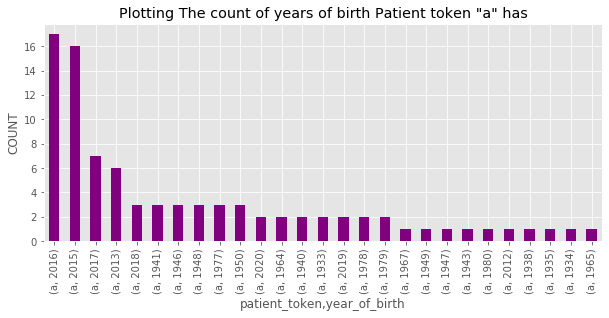

In [16]:
X = df_pharma[['patient_token','year_of_birth']]
y  = X.groupby(['patient_token'])
patient_a = y.get_group('a').value_counts().plot(kind='bar', figsize=(10,4), color= 'purple',  title='Plotting The count of years of birth Patient token "a" has')
patient_a.set_ylabel("COUNT")

From the chunk abover, we can see that patient that has a token of "a" has more than one year of bith, however we would like to search more to see if that occured in one pharmacy or multiple ones
- Why would we like to do that?
because it might happen that different patients are registered with the same token in different pharmacies. So, let's investigate this

Text(0, 0.5, 'COUNT')

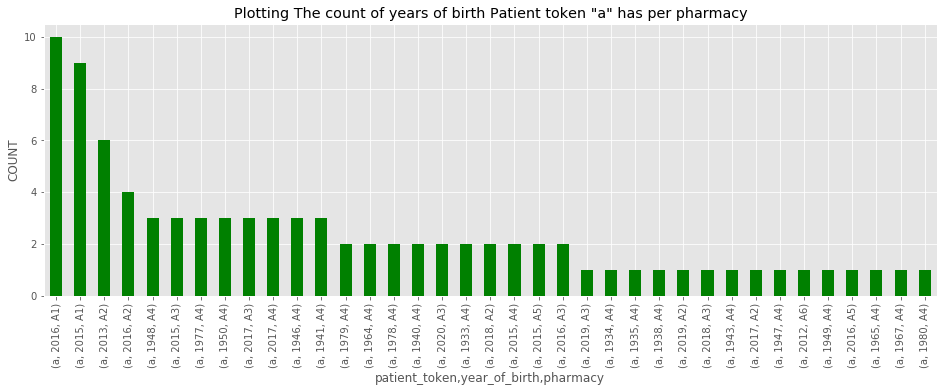

In [17]:
X = df_pharma[['patient_token','year_of_birth', 'pharmacy']]
y  = X.groupby(['patient_token'])
patient_a = y.get_group('a').value_counts().plot(kind='bar', figsize=(16,5), color= 'green',  title='Plotting The count of years of birth Patient token "a" has per pharmacy')
patient_a.set_ylabel("COUNT")

From the chunck above, we can see that patient with token "a" is registered in the same pharmacy as well as different pharmacies with different years of birth. Let's see if that occurred only for the patient with the token "a" or not.

In [18]:
y.get_group('OV.U@>nj7gjKZC').value_counts().to_frame()

0
patient_token  year_of_birth pharmacy   
OV.U@>nj7gjKZC 2001          A1        1
               1998          A1        1

Apparently, that didn't happen only for the patient with the token "a" but also that same happened to the patient with token "OV.U@>nj7gjKZC" that registered in the same pharmacy with a different year of birth.

Let's investigate the number of entries that has a duplicate patient token.

In [19]:
# Get the dupliacte values of the patient token in our dataframe.
print("Number of duplicate rows with the same patient_token: ", df_pharma[df_pharma.duplicated(['patient_token'])].shape[0])
# Get the unique values of the patient token in our dataframe.
print("Unique values: ", df_pharma.shape[0] - df_pharma[df_pharma.duplicated(['patient_token'])].shape[0])

Number of duplicate rows with the same patient_token:  1134374
Unique values:  68409


Let's group patients by age to see whether we can have better insight about the age concept.

From this site: Please [Click here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3825015/) 

we can find out a meaningful age groups in the context of disease which we will apply now
- First of all, we need to introduce a new column called age which will be taken out from the year of birth column.

In [20]:
df_pharma['age'] = pd.Timestamp.today().year - df_pharma['year_of_birth']

df_pharma[['year_of_birth', 'age']].tail(2)

,year_of_birth,age
1202781,2013,8
1202782,2013,8


Here we can see that the age matches the year_of_birth correctly.

In [21]:
# age_groups = ['0-2', '3-5', '6-13', '14-18', '19-33', '34-48', '49-64', '65-78', '79-98', '>99'];

# function that adds a column based on defined age groups
def define_age_group(lower, upper = -1):
    group = str(lower) + '-' + str(upper)
    if upper == -1:
        df_pharma.loc[(df_pharma['age'] >= lower), 'age_group'] = '+' + group
    else:
        df_pharma.loc[(df_pharma['age'] >= lower) & (df_pharma['age'] <= upper), 'age_group'] = group

# defining age groups
define_age_group(0, 2)
define_age_group(3, 5)
define_age_group(6, 13)
define_age_group(14, 18)
define_age_group(19, 33)
define_age_group(34, 48)
define_age_group(49, 64)
define_age_group(65, 78)
define_age_group(79, 99)
define_age_group(99)

df_pharma[['year_of_birth','age', 'age_group']].head()

,year_of_birth,age,age_group
0,2016,5,3-5
1,2016,5,3-5
2,2019,2,0-2
3,2016,5,3-5
4,2019,2,0-2


In [22]:
df_pharma['pharmacy'].value_counts().to_frame()

,pharmacy
A4,248256
A2,244742
A1,237300
A5,165531
A6,159079
A3,147875


Obviously that we have 6 Belgium pharmacies and that completely matches the data definition, We can see, moreover, that the pharmacy A4 has the most transactions but that does not necessarily mean that it has the highest revenue.<br>
To spot that we will get the revenue grouped by the pharmacy.

Now let's investigate each pharmacy revenue per year, to do that we have to follow some techniques:
- First of all, calculate the total price of each transaction by multiplying the price by the quantity
- Get the year and perhaps the month out of the supply_date feature if we need to get the revenue for a specific period of the year.
- Group by the pharmacy and the year and get the sum of the total price of each transaction.


In [23]:
# Calculate the transaction total price.
df_pharma['total_price'] = df_pharma['quantity'] * df_pharma['price']
df_pharma.head(2)

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price,age,age_group,total_price
0,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14
1,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14


Now, let's introduce the columns year and month.

In [24]:
# Extract the year and month from the supply date columnn of each transaction.
df_pharma['year'] = pd.DatetimeIndex(df_pharma['supply_date']).year
df_pharma['month'] = pd.DatetimeIndex(df_pharma['supply_date']).month

# Select the full date and its corresponds year and month
df_pharma[['supply_date', 'year', 'month']].head(2)

,supply_date,year,month
0,2017-02-01,2017,2
1,2017-02-01,2017,2


Now that we have extracted the month and year of the supply date column, let's group the dataset by pharmacy and year and sort the values by Total transactions price.

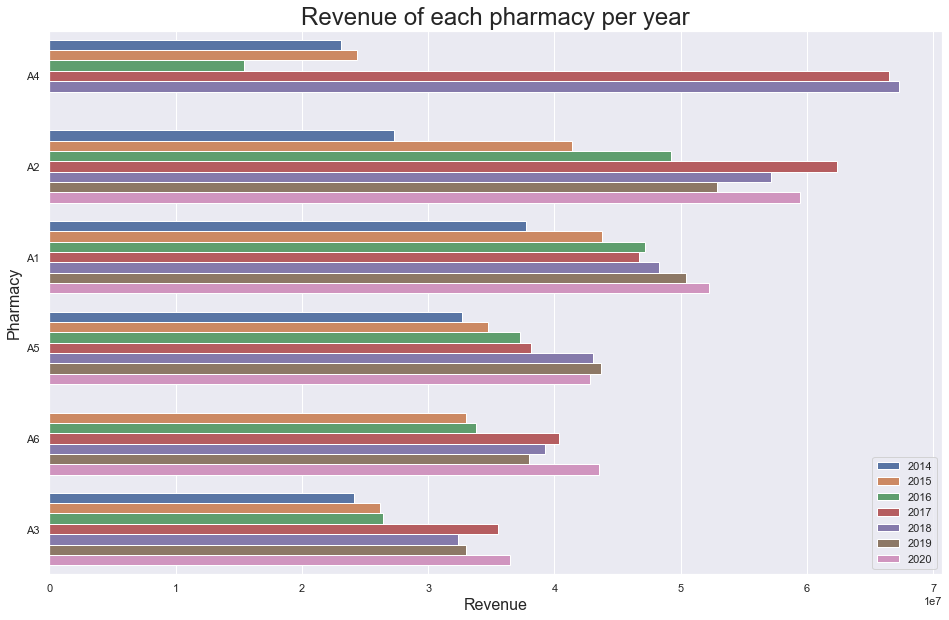

In [25]:
rev_per_pharmacy = df_pharma.groupby(['pharmacy', 'year']
                                     , as_index=False).sum().sort_values(by='total_price', 
                                                                         ascending=False)

plt.figure(figsize=(16, 10))
sns.set(font_scale = 1)
sns.barplot(data=rev_per_pharmacy, x='total_price', y='pharmacy', hue='year', ci=None)
plt.xlabel("Revenue",fontsize=16)
plt.ylabel("Pharmacy", fontsize=16)
plt.title("Revenue of each pharmacy per year", fontsize=24)
plt.legend()
plt.show()

From the plot above we can see that the pharmacy A4 in 2017 and 2018 had a much higher revenue than the rest of the pharmacies. However, the data from 2019 and 2020 is not present.

Now, let's investigate the Revenue of each pharmacy per month.

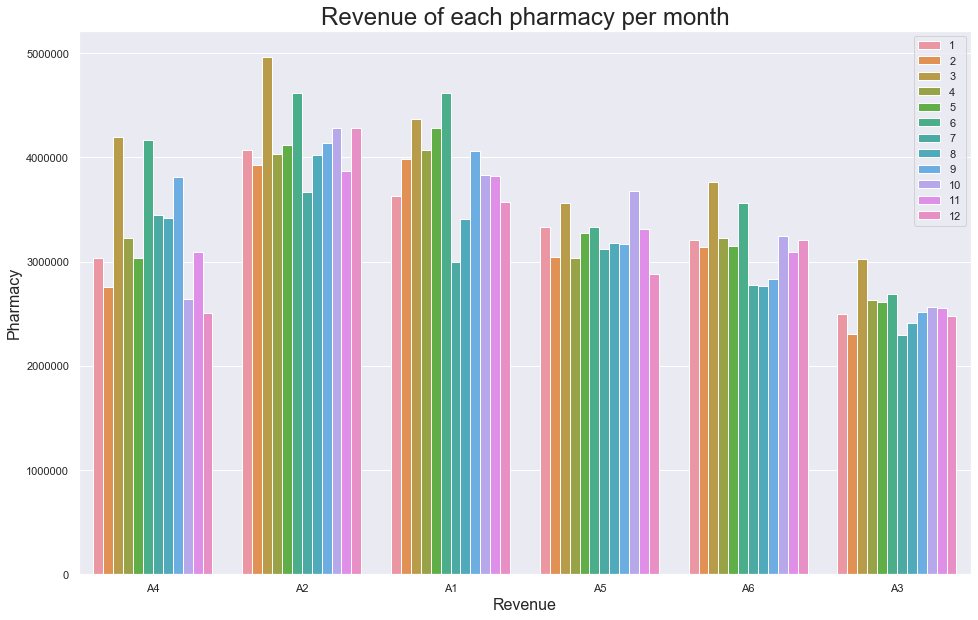

In [26]:
rev_per_pharmacy = df_pharma.groupby(['pharmacy', 'year', 'month']
                                     , as_index=False).sum().sort_values(by='total_price', 
                                                                         ascending=False)

plt.figure(figsize=(16, 10))
sns.set(font_scale = 1)
sns.barplot(data=rev_per_pharmacy, y='total_price', x='pharmacy', hue='month', ci=None)
plt.xlabel("Revenue",fontsize=16)
plt.ylabel("Pharmacy", fontsize=16)
plt.title("Revenue of each pharmacy per month", fontsize=24)
plt.legend()
plt.show()

<p>We can see that almost all 6 pharmacies reaches their highest revenue on the month of March and June relatively.

<li>This could be related to a flu sezion and the changes in tempretures.</p>

Let's plot the yearly revenue per each pharmacy each in one seperate plot for better understanding.

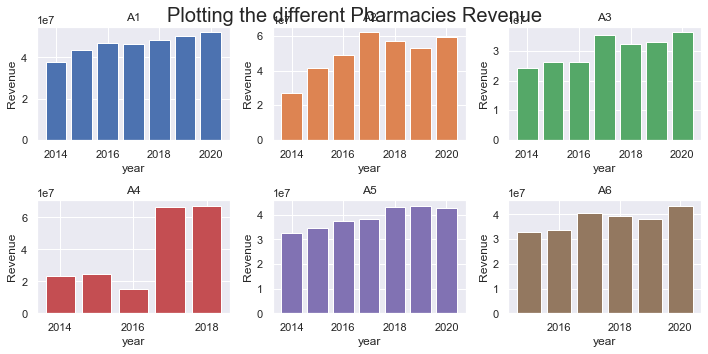

In [27]:
pharmacies = ['A1', 'A2','A3', 'A4', 'A5', 'A6']
x = df_pharma.groupby(['pharmacy','year'])['total_price'].sum().astype('int32')
colors = plt.rcParams["axes.prop_cycle"]()

fig, axes = plt.subplots(2,3, figsize=(10,5))
for phar, ax in zip(pharmacies, axes.ravel()):
    c = next(colors)["color"]
    ax.bar(x[phar].index, x[phar].values, color=c)
    ax.set_xlabel('year', fontsize=12)
    ax.set_ylabel('Revenue', fontsize=12)
    ax.set_title(phar)

plt.suptitle('Plotting the different Pharmacies Revenue', fontsize=20)
plt.tight_layout()
plt.show()

Here we can see the destinction between the yearly revenue of each individual pharmacy.


Now, we will save our modification in a CSV file if we want to access it later on.

In [28]:
df_pharma.to_csv('../data/data_processed.csv')

<p><b>In our dataset we can also see that we have an ATC code but what is is exactly and how can we get benifit  from?</b>

The Anatomical Therapeutic Chemical (ATC) Classification System is a drug classification system that classifies the active ingredients of drugs according to the organ or system on which they act and their therapeutic, pharmacological and chemical properties. It is controlled by the World Health Organization Collaborating Centre for Drug Statistics Methodology (WHOCC), and was first published in 1976.[1][2][3]

This pharmaceutical coding system divides drugs into different groups according to the organ or system on which they act, their therapeutic intent or nature, and the drug's chemical characteristics. Different brands share the same code if they have the same active substance and indications. 
    
<u>In this system, drugs are classified into groups at five different levels</u>


<b>First Level:
    
The first level of the code indicates the anatomical main group and consists of one letter. There are 14 main groups</b>
</p>

Now. Let's investigate our pharmacies to see how many pharmacies do we have and what is the pharmacy that has the most purchases and patients visited the most.

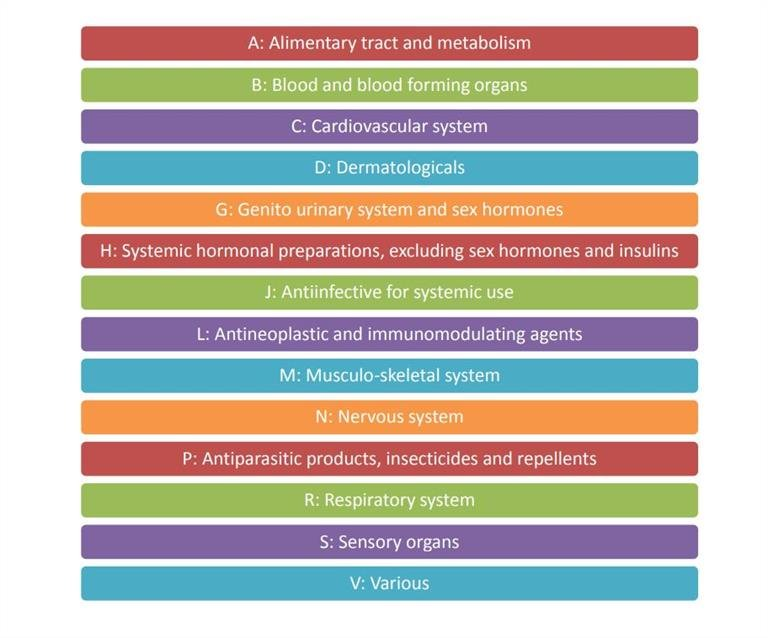

In [29]:
from IPython.display import Image
Image('../data/atc_first_level.jpeg')

<p> <b>Second level</b>
    
The second level of the code indicates the therapeutic subgroup and consists of two digits

Example: C03 Diuretics

<b>Third level</b>
    
The third level of the code indicates the therapeutic/pharmacological subgroup and consists of one letter.

Example: C03C High-ceiling diuretics

<b>Fourth level</b>
    
The fourth level of the code indicates the chemical/therapeutic/pharmacological subgroup and consists of one letter.

Example: C03CA Sulfonamides

<b>Fifth level</b>
    
The fifth level of the code indicates the chemical substance and consists of two digits.

Example: C03CA01 furosemide
</p>

We are mainly interested in the first level therefore we have created a CSV file that contains the code and its content relativity and we save the CSV file as atc_category.csv. Let's read this file first using pandas read_csv() function

In [30]:
# anatomical or pharmacological groups
atc_category = pd.read_csv('../data/atc_category.csv',
                           header=None, 
                           names=['atc_prefix', 'atc_category'])

atc_category.to_csv('../data/modified_atc_categories.csv')
atc_category

,atc_prefix,atc_category
0,A,Alimentary
1,B,Blood
2,C,Cardiovascular
3,D,Dermatologicals
4,G,Gentio_Urinary
5,H,Hormonal
6,J,Antiinfetive
7,L,Immunomodulating_Agents
8,M,Muscalo_Skeletal
9,N,Nervous


Now, let's investigate each transaction atc code to inspect the medicine category.
- We will start by slicing the ATC code and stop on position 1 to get the first letter as we have already mentioned that The first level of the code indicates the anatomical main group and consists of one letter
- Secondly, we will merge our dataset with the previously defined atc_category dataset on the ATC code first level

In [31]:
# Slicing the ATC code and stop on position 1 to get the first level.
# Assign the result to atc_prefix variable.
df_pharma['atc_prefix'] = df_pharma['atc'].str.slice(stop=1)
df_pharma['atc_prefix'][:3]

0    A
1    A
2    A
Name: atc_prefix, dtype: object

Now, merge the two dataframes on the atc_prefix.

In [32]:
df_pharma = df_pharma.merge(atc_category, on='atc_prefix')
df_pharma[['atc', 'atc_prefix', 'atc_category']].head()

,atc,atc_prefix,atc_category
0,A07AA02,A,Alimentary
1,A07AA02,A,Alimentary
2,A07AA02,A,Alimentary
3,A10AC01,A,Alimentary
4,A03FA05,A,Alimentary


## 4.1. Gender inequality <a class="anchor" id="section4.1"></a>

In order to have a better grasp on how much revenue each ATC per gender has brought over the years, we can plot a bar plot.

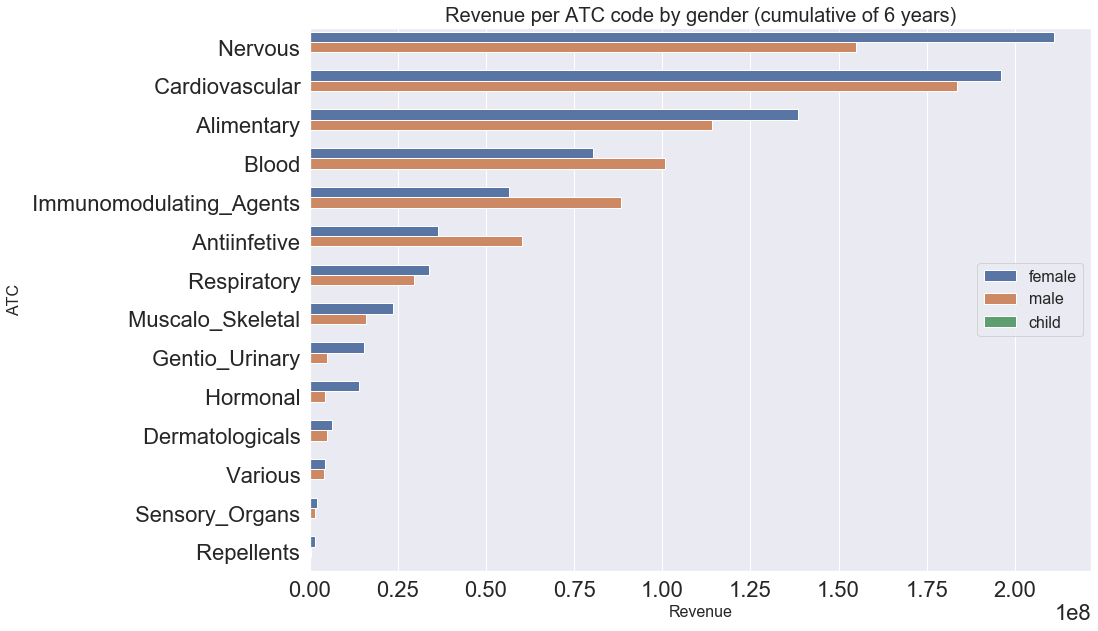

In [33]:
rev_per_atc = df_pharma.groupby(['atc_category', 'gender'], as_index=False).sum().sort_values(by='total_price', ascending=False)


plt.figure(figsize=(14, 10))
sns.set(font_scale = 2)
sns.barplot(data=rev_per_atc, x='total_price', y='atc_category', hue='gender', ci=None)
plt.xlabel("Revenue", fontsize=16)
plt.ylabel("ATC", fontsize=16)
plt.title("Revenue per ATC code by gender (cumulative of 6 years)", fontsize=20 )
plt.legend(loc='best', fontsize=16)
plt.show()

Looking at the graph above, we can clearly see that medicine that relates to the nervous system has brought the most revenue overall and that is the most popular with female customers while also being very popular with male customers.

Also, we can also infer that cardiovascular medicines ties very closely; being more popular with female than male customers.

Moreover, the Blood and Immunomodulating_Agents are being more popular with male than female with the most revenue.

It is alos important to note that the gender defined as _children_ does not appear here. This means that revenue of this gender has no statistical significance.

## 4.2. Age Group Analysis <a class="anchor" id="section4.2"></a>

In order to have a better latch on to how much revenue each ATC per age group has brought over the years, we can plot a bar plot.

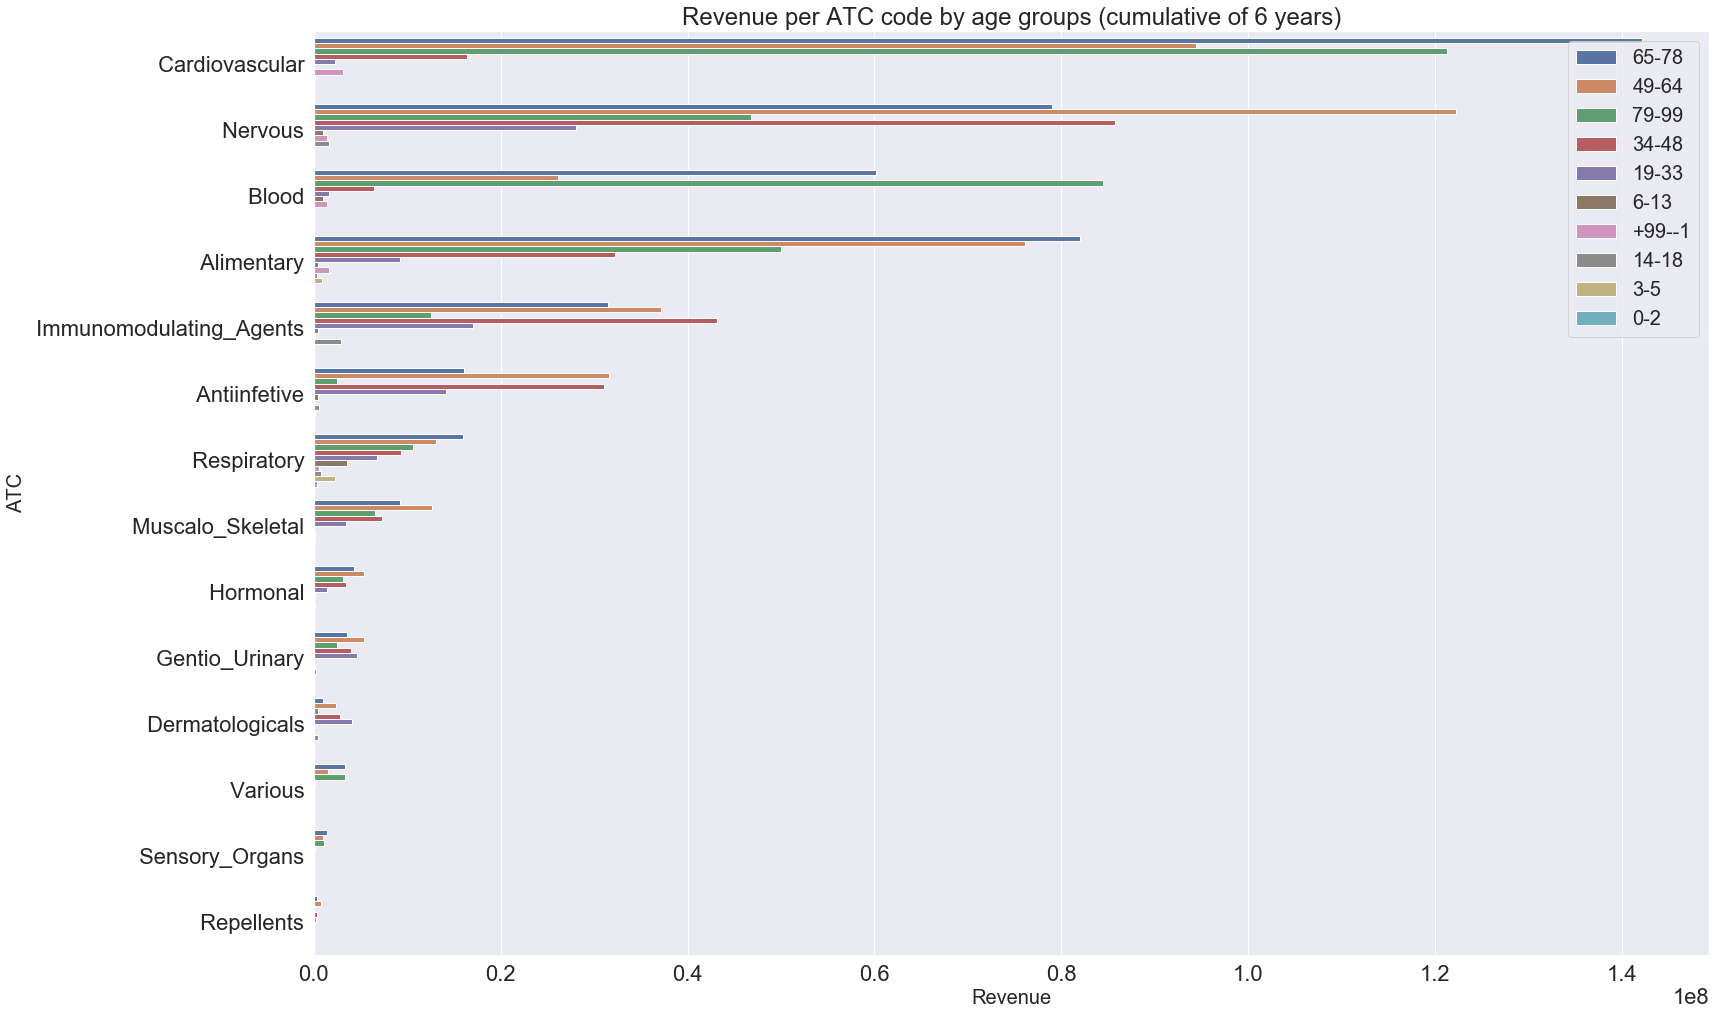

In [34]:
rev_per_atc = df_pharma.groupby(['atc_category', 'age_group'], 
                                as_index=False).sum().sort_values(by='total_price', 
                                                                  ascending=False)

plt.figure(figsize=(25, 17))
sns.set(font_scale = 2)
sns.barplot(data=rev_per_atc, x='total_price',y='atc_category', hue='age_group', ci=None)
plt.xlabel("Revenue", fontsize=20)
plt.ylabel("ATC", fontsize=20)
plt.title("Revenue per ATC code by age groups (cumulative of 6 years)", fontsize=24 )
plt.legend(loc='best', fontsize=20)
plt.show()

The graph above spot that, medicine that relates to the Cardiovascular system has brought the most revenue among patients in the age group of **_65-78_**

Also, we can also infer that Nervous medicines has the highest revenue among patients in the age group of **_49-64_**.

Nevertheless, the Blood medicines score their highest revenue among patients of the age group between **_79-99_** years old.

It is also important to note that the ATC category of Repellents brought the minimum Revenue to the pharmacies towards all age groups.

## 4.3. Order Supply <a class="anchor" id="section4.3"></a>

It would be intresting to check order traffic in a typcal week. To achieve this, we would need **_supply_hour_** as a numeric value (e.i. _17:34_ would be _17.0_; rounded) and **_supply_day_** as text value (e.i. _2017-02-01_ would be _Wednesday_)

#### A. Getting weekdays from datetime 

In [35]:
# defining weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# map weekdays into 'supply_day_text' based on 'supply_date' date
df_pharma['supply_day_text'] = df_pharma['supply_date'].dt.weekday.replace([0,1,2,3,4,5,6], weekdays)

df_pharma.head(3)

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price,age,age_group,total_price,year,month,atc_prefix,atc_category,supply_day_text
0,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14,2017,2,A,Alimentary,Wednesday
1,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14,2017,2,A,Alimentary,Wednesday
2,a,2020-08-01,15:13,A3,2019,male,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.29,2,0-2,7.29,2020,8,A,Alimentary,Saturday


In [36]:
df_pharma.to_csv('../data/extracted_new_features.csv')
df_pharma

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price,age,age_group,total_price,year,month,atc_prefix,atc_category,supply_day_text
0,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14,2017,2,A,Alimentary,Wednesday
1,a,2017-02-01,17:14,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14,2017,2,A,Alimentary,Wednesday
2,a,2020-08-01,15:13,A3,2019,male,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.29,2,0-2,7.29,2020,8,A,Alimentary,Saturday
3,a,2017-05-29,00:00,A4,1977,female,1077718,"INSULATARD PENFILL 100 IU/ML 5 X 3,0ML",A10AC01,5,28.29,44,34-48,141.45,2017,5,A,Alimentary,Monday
4,a,2017-05-29,00:00,A4,1977,female,818724,LITICAN AMP INJ 6 X 50 MG/2 ML,A03FA05,6,7.53,44,34-48,45.18,2017,5,A,Alimentary,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202778,oz.gSjOgp7z9?8,2015-12-15,16:53,A2,1997,male,51045,KAYEXALATE CALCIUM PULV 1 X 300 G,V03AE01,1,21.90,24,19-33,21.90,2015,12,V,Various,Tuesday
1202779,oz.gSjOgp7z9?8,2015-12-15,16:53,A2,1996,male,51045,KAYEXALATE CALCIUM PULV 1 X 300 G,V03AE01,1,21.90,25,19-33,21.90,2015,12,V,Various,Tuesday
1202780,oz.gSjOgp7z9?8,2018-12-26,14:26,A2,1995,male,51045,KAYEXALATE CALCIUM PULV 1 X 300 G,V03AE01,1,21.94,26,19-33,21.94,2018,12,V,Various,Wednesday
1202781,oz.gSjOgp7z9?8,2018-12-26,14:26,A2,1997,male,51045,KAYEXALATE CALCIUM PULV 1 X 300 G,V03AE01,1,21.94,24,19-33,21.94,2018,12,V,Various,Wednesday


In [37]:
# to avoid any problems, simply drop columns which have null values
# IMPORTANT: from prior knowledge, only some of the 'supply_hour' values are missing, nothing else
order_per_weekday = df_pharma.dropna(subset=["supply_hour"], axis=0)
# reset index, because we droped two rows
order_per_weekday.reset_index(drop=True, inplace=True)
order_per_weekday.shape

(605721, 19)

Our dataset has 1.202.278 entries 597062 of them missing the supply_hour, therefore, after we've dropped the missing values we get 605720 entries

#### B. Reformatting hours into float values

In [38]:
# perform reformatting
s = order_per_weekday['supply_hour'].apply(str).str.slice(stop=2).astype('float')
s = pd.to_numeric(s)
order_per_weekday['supply_hour'] = s
order_per_weekday.head(3)

,patient_token,supply_date,supply_hour,pharmacy,year_of_birth,gender,cnk,name,atc,quantity,price,age,age_group,total_price,year,month,atc_prefix,atc_category,supply_day_text
0,a,2017-02-01,17.0,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14,2017,2,A,Alimentary,Wednesday
1,a,2017-02-01,17.0,A2,2016,female,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.14,5,3-5,7.14,2017,2,A,Alimentary,Wednesday
2,a,2020-08-01,15.0,A3,2019,male,62521,NYSTATINE SUSP OR 1X24ML 100000U/ML,A07AA02,1,7.29,2,0-2,7.29,2020,8,A,Alimentary,Saturday


#### C. Graphing the data

Now that we have the dataset ready, we can plot total orders per hour, ordered by gender and pharmacy

In [39]:
def plot_total_orders(data,hue):
    #data = data['supply_hour']
    plt.figure(figsize=(20,8))
    fig = sns.countplot(x=data['supply_hour'], data=data, hue=hue)
    plt.xlabel('Time')
    plt.ylabel('Orders')
    plt.title(f'Daily orders per {hue}')
    plt.show()

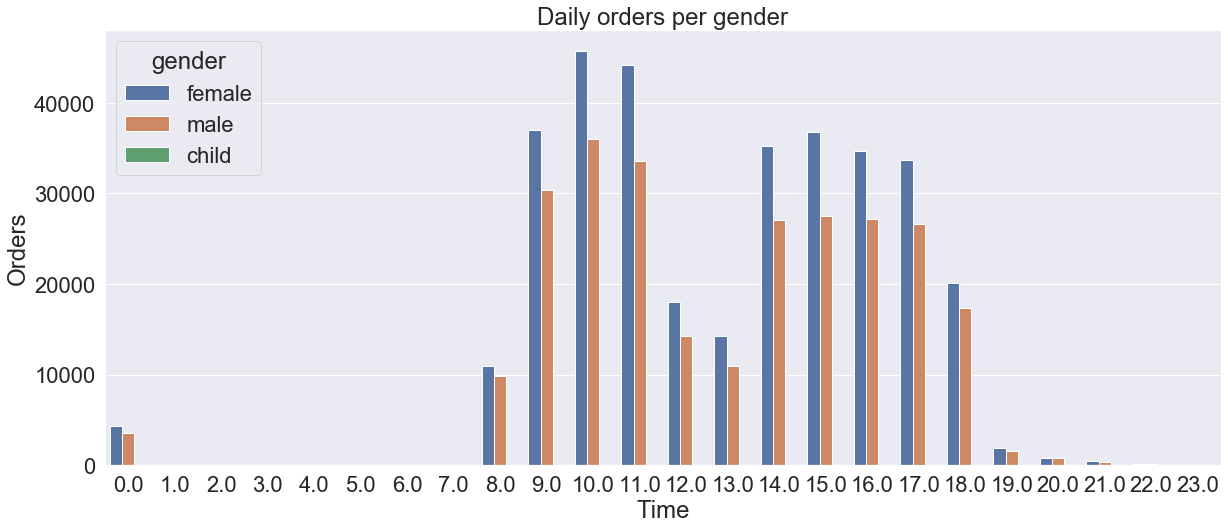

In [40]:
plot_total_orders(order_per_weekday, 'gender')

We can see that some pharmacies work at midnight.

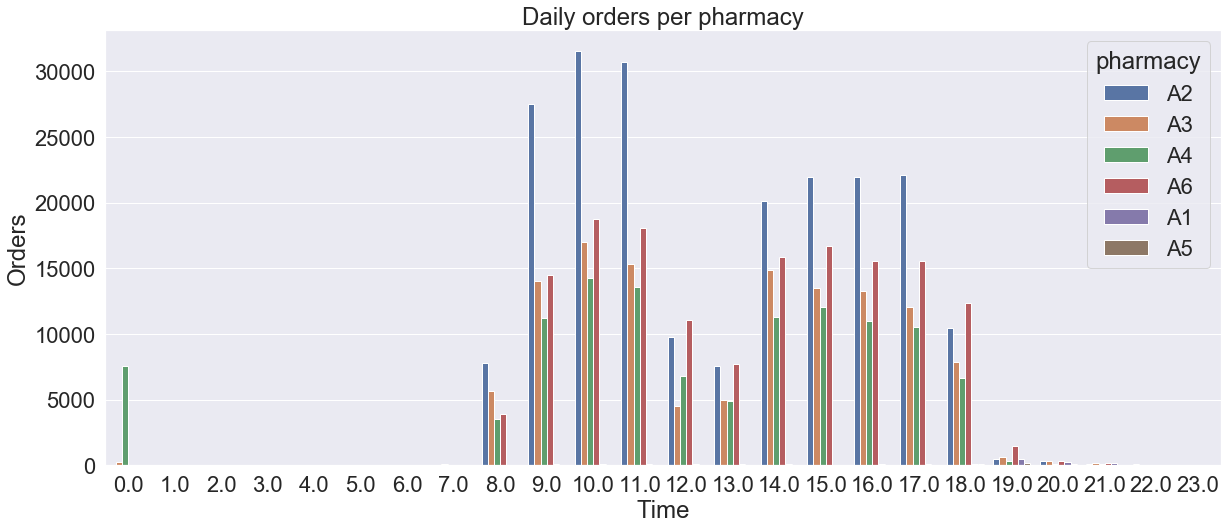

In [41]:
plot_total_orders(order_per_weekday,'pharmacy')

We see from two plots above that there are two peeks during the day for which orders are high. Relatively speaking, before and after launch. However, pharmacy A2 has the highest daily orders between 9:00 AM and 11:00 AM and between 14:PM and 17:00 PM.
A4 and A3 are the pharmacies that work at mednight.

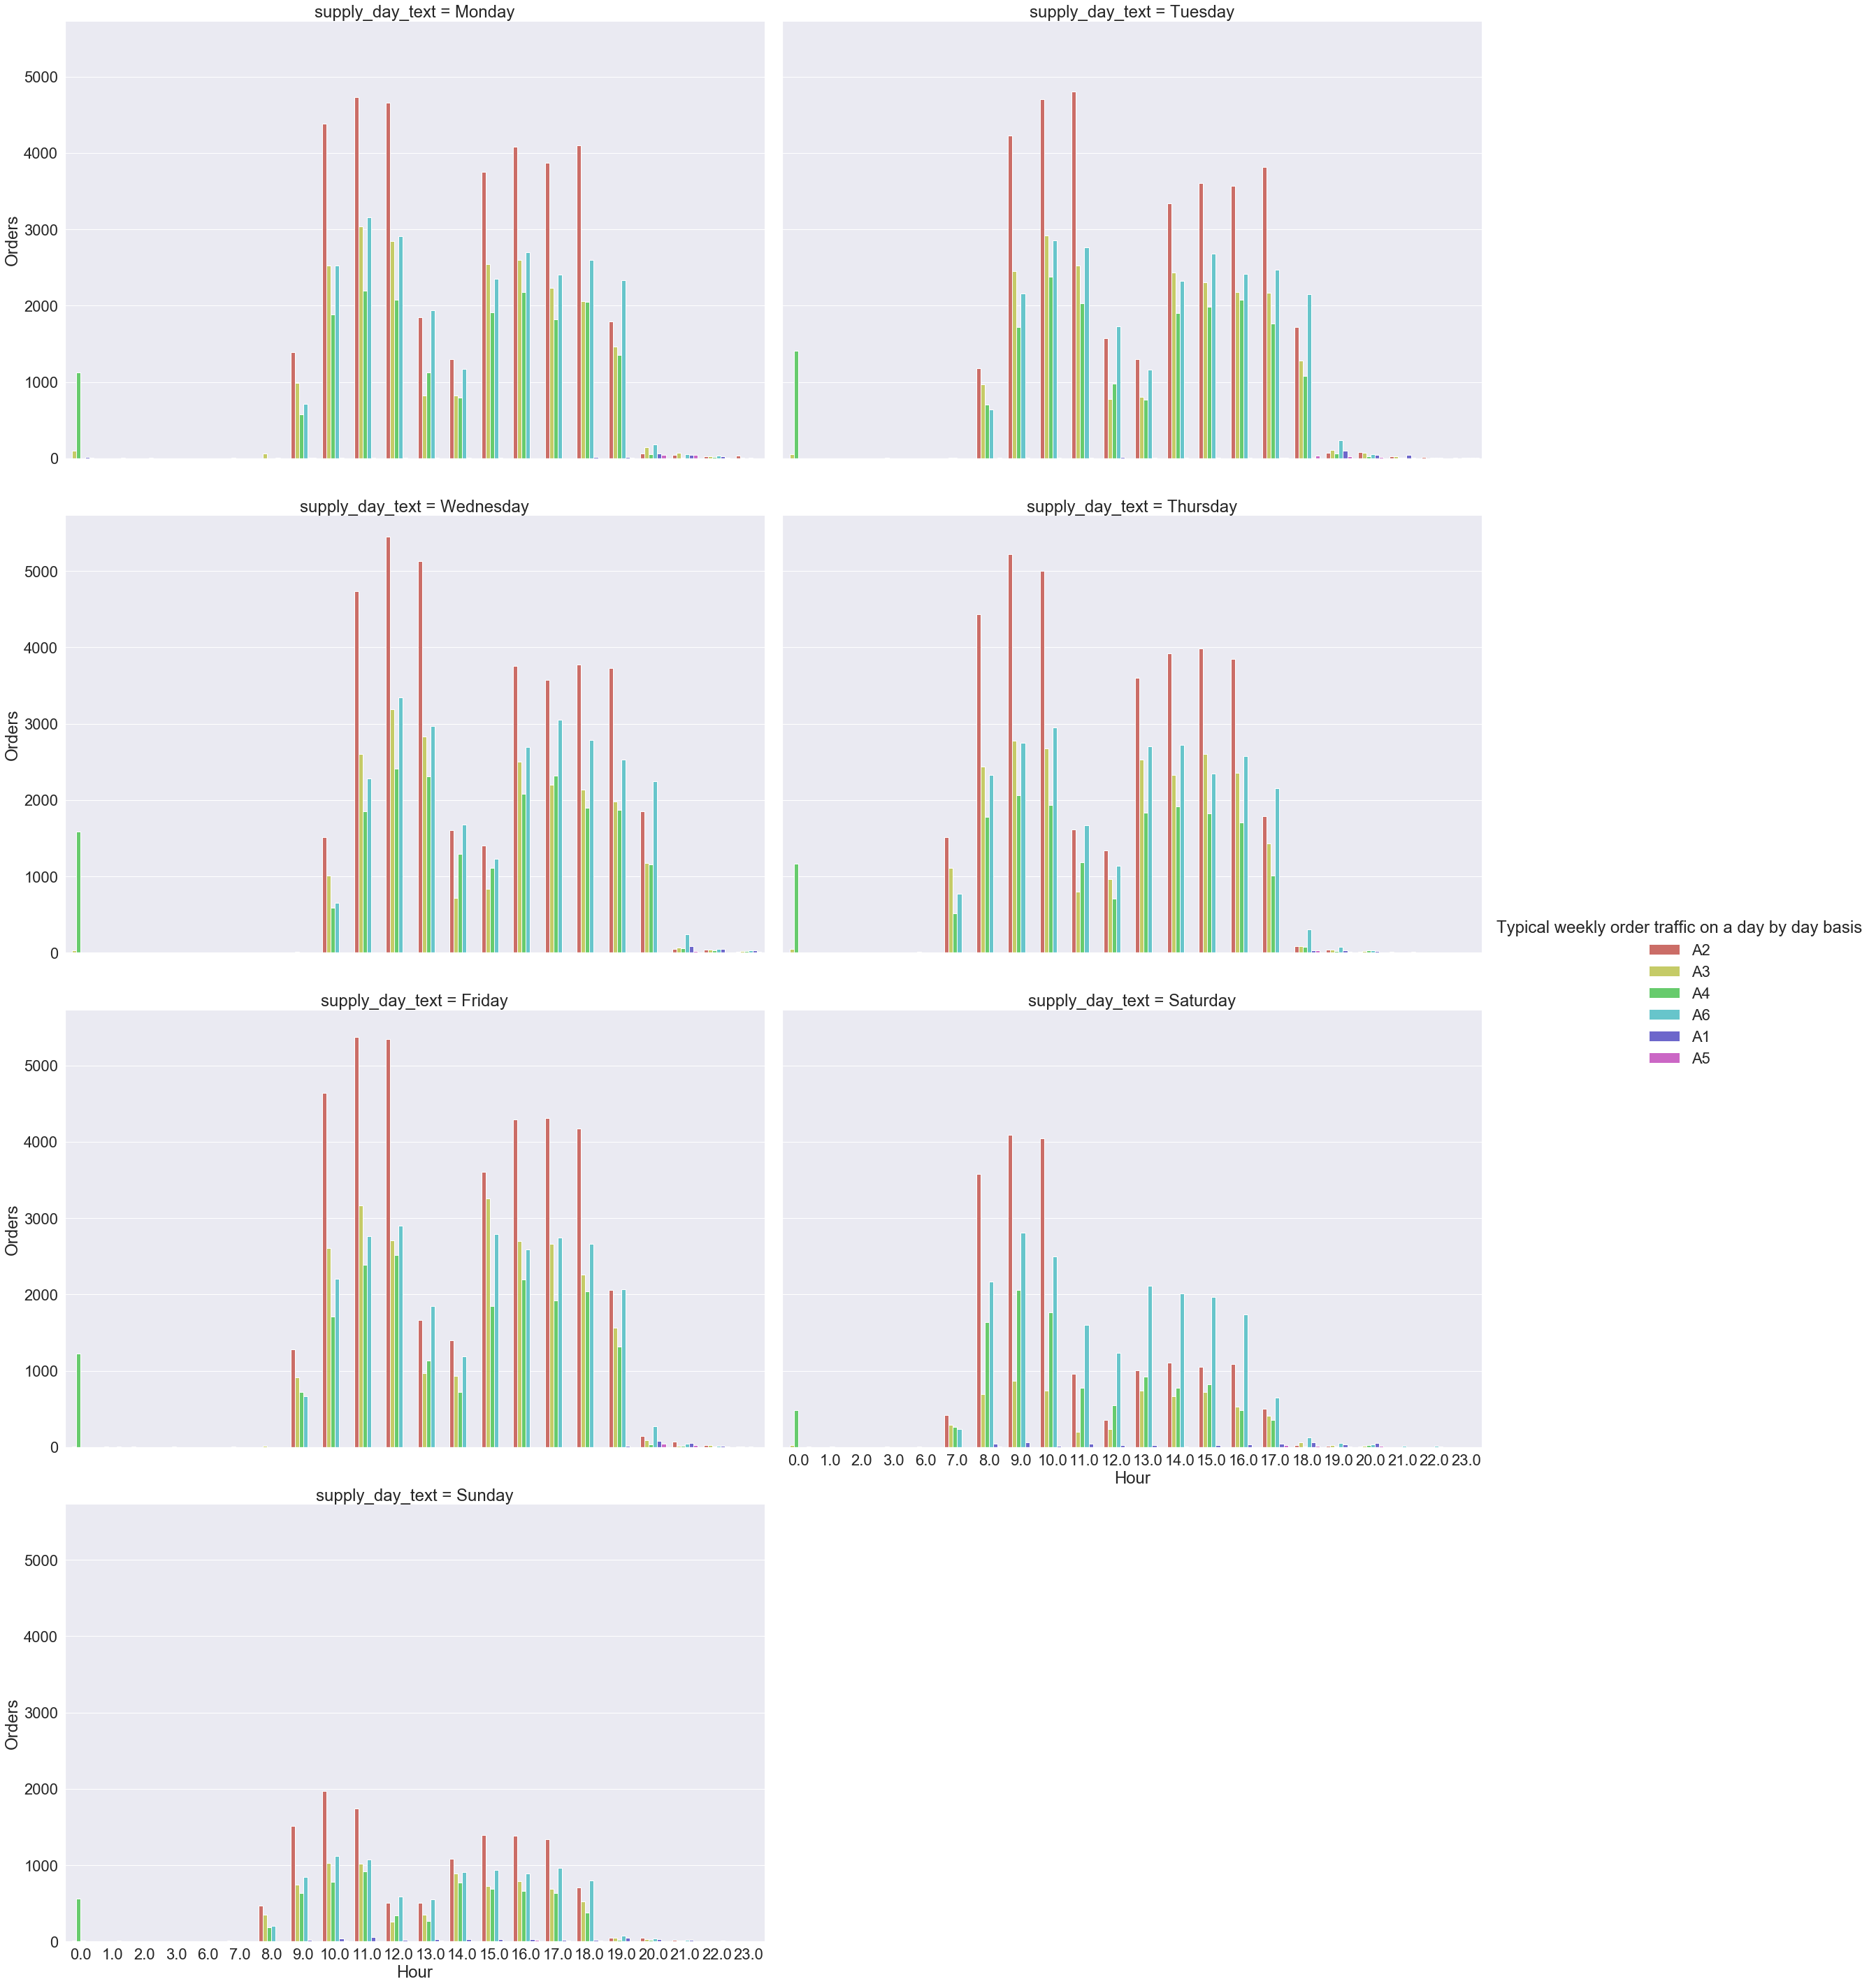

In [42]:
fig = sns.FacetGrid(order_per_weekday, col='supply_day_text', col_wrap=2, height=5, aspect=1.5, col_order=weekdays, size=10)
fig.map(sns.countplot, 'supply_hour', hue=order_per_weekday['pharmacy'], palette='hls')
fig.set_axis_labels('Hour', 'Orders')
fig.add_legend(title='Typical weekly order traffic on a day by day basis')

Now with this facetgrid, we can get more insight of how a typical week looks like in terms of amplitude (not total orders) and again, we see that there are two peaks before and after launch hours everyday. However, we can also see that order traffic drastically decreases towards the end of the week, on the weekend.

Let's now explore the correlation between the different features in our dataset.
### What does correalation mean?

<p><b>Correlation</b> is a term that refers to the strength of a relationship between two variables where a strong, or high, correlation means that two or more variables have a strong relationship with each other while a weak or low correlation means that the variables are hardly related. Correlation analysis is the process of studying the strength of that relationship with available statistical data.<p>

In [43]:
# Read the dataset again after adding the new features.
df_pharma = pd.read_csv('../data/extracted_new_features.csv')
# Drop the unnecessary column and specify axis=1 to ensure that we will drop the column
# axis=0 => row , axis=1 => column
df_pharma = df_pharma.drop('Unnamed: 0', axis=1)

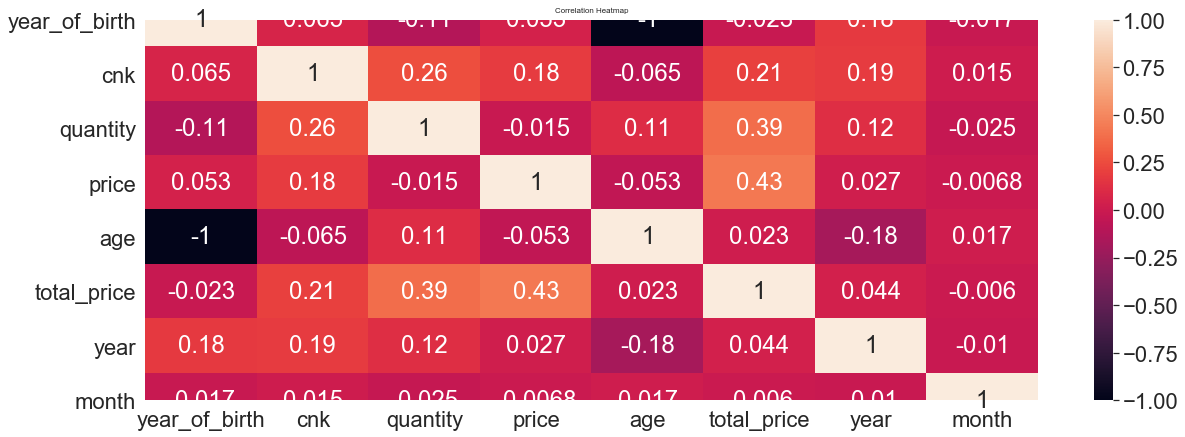

In [64]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 7))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True
# to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_pharma.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=8);

<p>From the heatmap above we can see that the correlations between features are quite low. We have to keep in mind that the correlation is a measure of linear association, so we might get low values for strongly non-linear association which can be captured by learning algorithms.
    
<li> We can also spot the correlation between the age and the year_of_birth as -1 which means extreamly strong negative correlation that's because we extracted the age from the year_of_birth.

 </p>

In [45]:
df_pharma.corr()['price'].sort_values()

age             -0.053332
quantity        -0.014623
month           -0.006808
year             0.027429
year_of_birth    0.053332
cnk              0.181454
total_price      0.432313
price            1.000000
Name: price, dtype: float64

### Predictive Power Score

Correlation is a statistical method used to assess a possible linear association between two continuous variables. However, with Predictive Power there is possibility to predict linear as well as **non-linear relationship** between two columns. The PPS is an asymmetric, data-type-agnostic score. The score ranges from **0 (no predictive power)** to **1 (perfect predictive power)**. It can be used as an alternative to the correlation (matrix).

In [50]:
# If you dont have the lib - pip install ppscore
import ppscore as pps

# Creating a test dataframe for the ppscore
df_test = df_pharma.head(100)
# Create a matrix with all the results
pps_matrix = pps.matrix(df_test)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,patient_token,patient_token,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,patient_token,supply_date,0.256957,classification,True,weighted F1,0.020000,0.271817,DecisionTreeClassifier()
2,patient_token,supply_hour,0.362619,classification,True,weighted F1,0.026716,0.379647,DecisionTreeClassifier()
3,patient_token,pharmacy,0.682529,classification,True,weighted F1,0.290000,0.774596,DecisionTreeClassifier()
4,patient_token,year_of_birth,0.000000,regression,True,mean absolute error,4.480000,4.844315,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
356,supply_day_text,year,0.155696,regression,True,mean absolute error,1.800000,1.519748,DecisionTreeRegressor()
357,supply_day_text,month,0.092435,regression,True,mean absolute error,3.210000,2.913284,DecisionTreeRegressor()
358,supply_day_text,atc_prefix,0.000000,target_is_constant,True,None,1.000000,1.000000,None
359,supply_day_text,atc_category,0.000000,target_is_constant,True,None,1.000000,1.000000,None


Here we can see that along with the ppscore it provides a lot more information that is the  Model it uses for finding the score, what is the core of the model, evaluation metric used, etc.

In [69]:
# view correlation between two features and their score
pps.score(df_test, "price", "quantity") 

{'x': 'price',
 'y': 'quantity',
 'ppscore': 0.7167467948717949,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 24.96,
 'model_score': 7.07,
 'model': DecisionTreeRegressor()}

In [72]:
# Similarly, we can find the PP Score for all the features against the targeted variable - "price"
pps.predictors(df_test, "price")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,cnk,price,0.862166,regression,True,mean absolute error,15.812900,2.179555,DecisionTreeRegressor()
1,name,price,0.805635,regression,True,mean absolute error,15.812900,3.073480,DecisionTreeRegressor()
2,total_price,price,0.735842,regression,True,mean absolute error,15.812900,4.177100,DecisionTreeRegressor()
3,atc,price,0.708924,regression,True,mean absolute error,15.812900,4.602749,DecisionTreeRegressor()
4,patient_token,price,0.421836,regression,True,mean absolute error,15.812900,9.142454,DecisionTreeRegressor()
5,supply_date,price,0.318793,regression,True,mean absolute error,15.812900,10.771856,DecisionTreeRegressor()
6,quantity,price,0.267195,regression,True,mean absolute error,15.812900,11.587770,DecisionTreeRegressor()
7,pharmacy,price,0.197021,regression,True,mean absolute error,15.812900,12.697421,DecisionTreeRegressor()
8,gender,price,0.186123,regression,True,mean absolute error,15.812900,12.869757,DecisionTreeRegressor()
9,year,price,0.053664,regression,True,mean absolute error,15.812900,14.964318,DecisionTreeRegressor()


#### Calculation of the PPS
There are multiple ways how you can calculate the PPS. The ppscore package provides a sample implementation that is based on the following calculations:

- **The score is calculated using only 1 feature** trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance

- **The score** is calculated on the test sets of a **4-fold crossvalidation**

- **All rows** which have a missing value in the feature or the target column are **dropped**

- In case that the dataset has more **than 5,000 rows** the score is only calculated on a random subset of 5,000 rows with a fixed random seed (ppscore.RANDOM_SEED).

- There is **no grid search** for optimal model parameters

In [73]:
matrix_df = pps.matrix(df_test).pivot(columns='x', index='y',  values='ppscore')

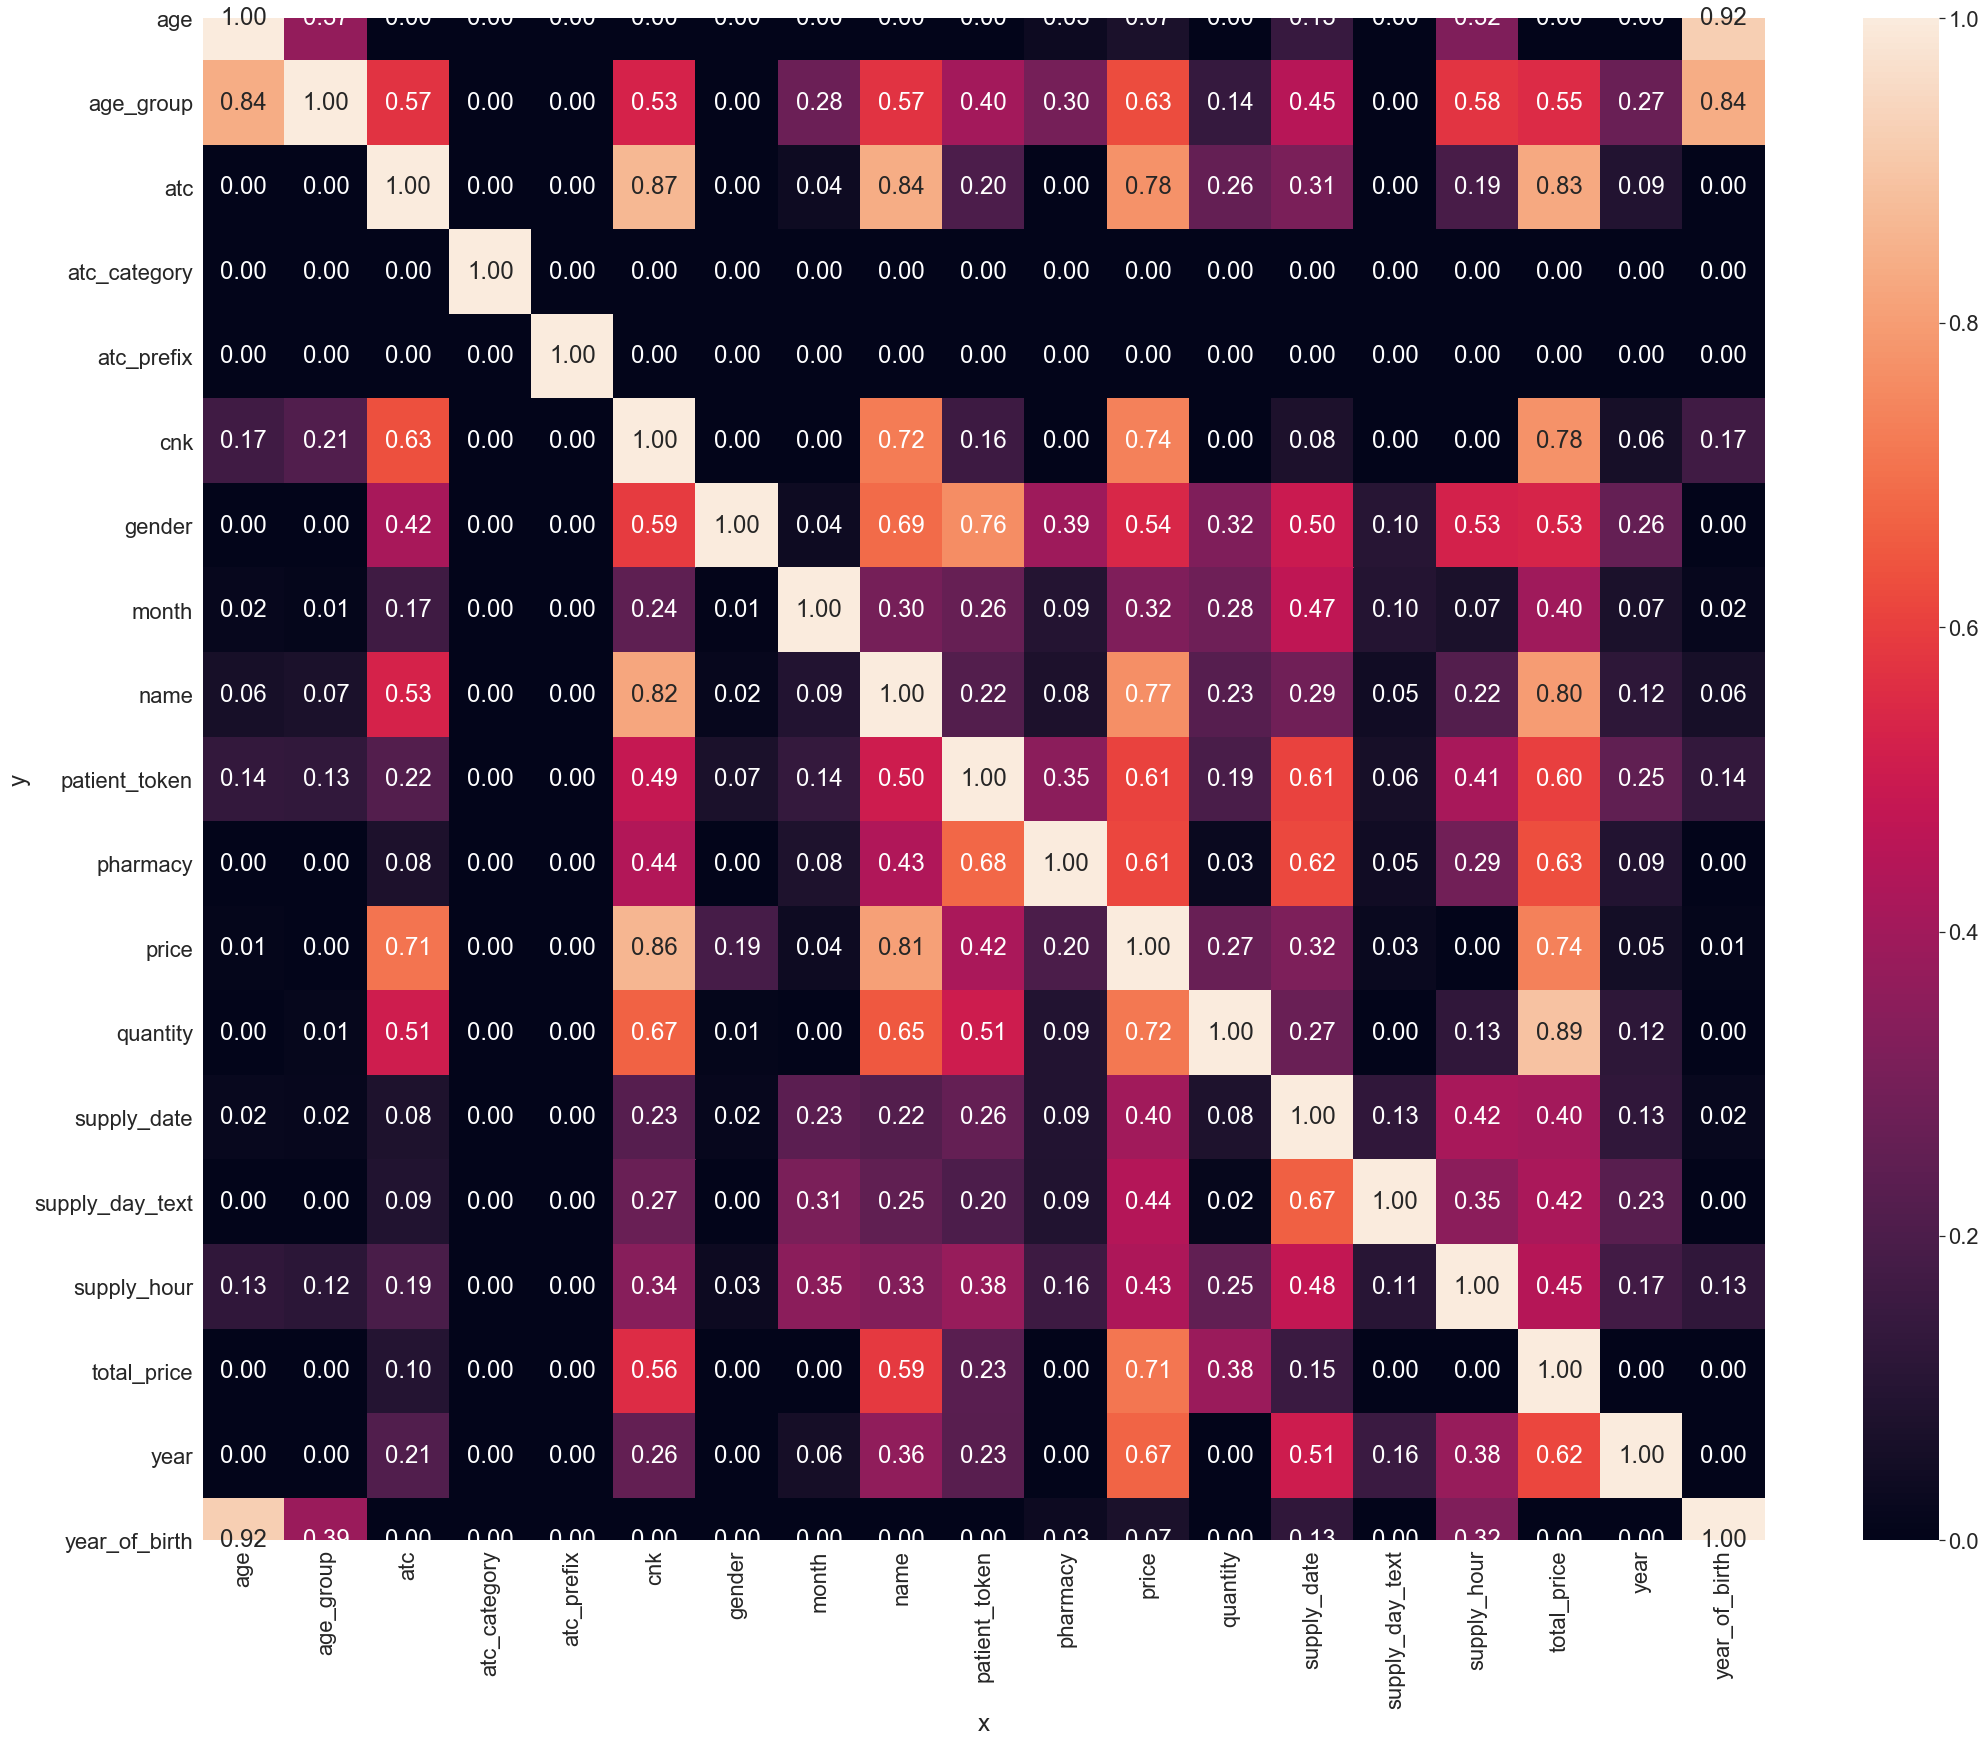

In [84]:
# This is how we can visualize the ppscore relationship between different attributes of the dataset.
plt.figure(figsize=(35, 28))
sns.heatmap(matrix_df, annot=True, fmt=".2f")

From the **ppscore heatmap** above we can see that the correlation between some of the features is good enough. It takes in the count all the columns which are there in the dataset which makes it more useful and powerful.
We can spot that there is strong **non-linear correlation** in the lightest parts of the heatmap, which for example are those for **price, name, cnk and atc code**. 

## 5. Conclusion <a class="anchor" id="section5"></a>

Based on the given data

What kind of predictions we can find from the EDA above for example?

- time series predictions based on delivery date.
- Sales prediction per pharmacy based on the category
- Recommondation per shift (Hoe many employees do we need per shift?)
- Predictions for specific medication per month based on 

## 6. References <a class="anchor" id="section6"></a>

<!-- [1] Heart Disease Data Set, https://archive.ics.uci.edu/ml/datasets/Heart+Disease -->